Vector c:
[[ 15.42168358]
 [-11.71981508]]
0.5262816860002073
0.048
-6.754070821090552
0.11199999999999997
5.701286946550787
      converged: True
           flag: 'converged'
 function_calls: 2
     iterations: 1
           root: 2.959196453755906


/usr/local/anaconda3/lib/python3.7/site-packages/scipy/optimize/zeros.py:343: RuntimeWarning: Tolerance of 3.903902044599157 reached.
  warnings.warn(msg, RuntimeWarning)


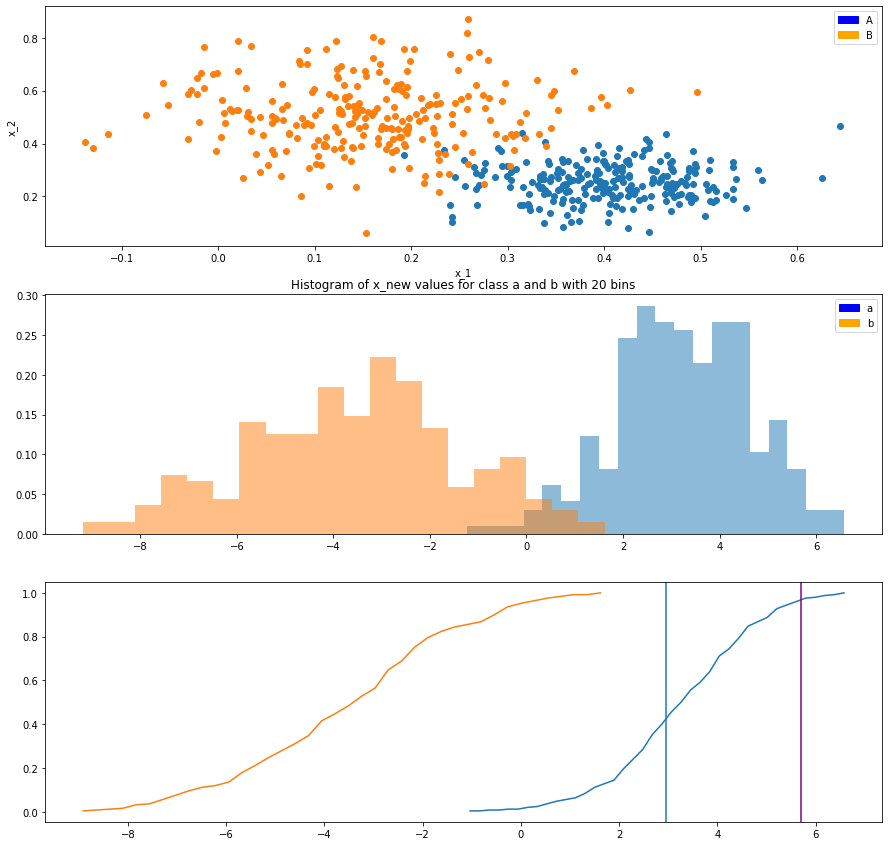

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.interpolate import interp1d
from scipy import optimize
import scipy

A = np.loadtxt('exam2020_cata.txt')
B = np.loadtxt('exam2020_catb.txt')
A_1 = np.loadtxt("exam2020_cata.txt")[:,0 ] #first column of data set A
A_2 = np.loadtxt("exam2020_cata.txt")[:,1 ] #second column of data set A
B_1 = np.loadtxt("exam2020_catb.txt")[:,0 ] #first column of data set B
B_2 = np.loadtxt("exam2020_catb.txt")[:,1 ] #second column of data set B

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,15))
ax1.scatter(A_1, A_2)
ax1.scatter(B_1, B_2)
blue_patch = mpatches.Patch(color='blue', label='A')
orange_patch = mpatches.Patch(color='orange', label='B')
ax1.legend(handles=[blue_patch, orange_patch])
ax1.set_xlabel('x_1')
ax1.set_ylabel('x_2')

V_a = np.cov(A_1, A_2)
V_b = np.cov(B_1, B_2)
#print((V_a + V_b))
V = np.linalg.inv(V_a+V_b)
mu_a1 = np.mean(A_1)
mu_a2 = np.mean(A_2)
mu_b1 = np.mean(B_1)
mu_b2 = np.mean(B_2)
mu_a = np.array([[mu_a1], [mu_a2]])
mu_b = np.array([[mu_b1], [mu_b2]])
#print(mu_a- mu_b)
y= (mu_a - mu_b)
c=np.matmul(V,y)
x_newa = c[0] * A_1 + c[1] * A_2
x_newb = c[0] * B_1 + c[1] * B_2
hist_a, bin_edges_a, patches_a = ax2.hist(x_newa, alpha=0.5, label="a", density=True, bins=20)
hist_b, bin_edges_b, patches_b = ax2.hist(x_newb, alpha=0.5, label="b", density=True, bins=20)
blue_patch = mpatches.Patch(color='blue', label='a')
orange_patch = mpatches.Patch(color='orange', label='b')
ax2.legend(handles=[blue_patch, orange_patch])
ax2.set_title('Histogram of x_new values for class a and b with 20 bins')
print('Vector c:')
print(c)



dx_a = binsa[1]-binsa[0] #from 0 to 1
dx_b = binsb[1] - binsb[0]

F1 = np.cumsum(counta*dx_a)
F2 = np.cumsum(countb * dx_b)

ax3.plot(binsa[1:], F1)
ax3.plot(binsb[1:], F2)

print(binsa[9])
print(F1[9])
print(binsb[9])
print(F2[9])

for x in range(250):
    if((x/250)>= 0.90):
        x_new_g = x_newa[x]
    
    
print(x_new_g)
ax3.axvline(x_new_g, color='purple')

bins_a = 40
bin_widths_a = np.histogram_bin_edges(counta, binsa[1:])
#b y axis for hist above
#print(len(x_newb), len(bin_widths_b))


cdf_a = scipy.interpolate.interp1d(countb, np.cumsum(bins_a * bin_widths_a),bounds_error=False, fill_value=(0, 1))

sol = scipy.optimize.root_scalar(
    lambda x: cdf_a(x) - 0.90,
    x0=(x_newa.mean() + x_newa.min()) / 2,
    x1=(x_newa.mean() + x_newa.max()) / 2)
print(sol)
ax3.axvline(sol.root)

In [20]:
print(len(A_1))

250


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


weighting factors c= [ 15.42168358 -11.71981508]
90% rejection on A reached for xnew > 5.041495 [ numpy ]
90% rejection on A reached for xnew > 5.157729[manual]
B accept. for x_3 > 5.041495: 0.004000


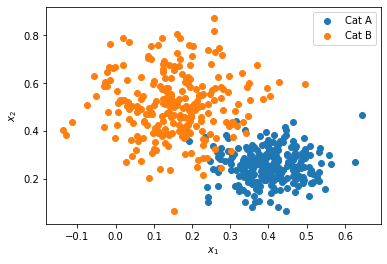

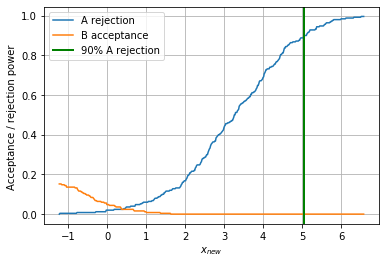

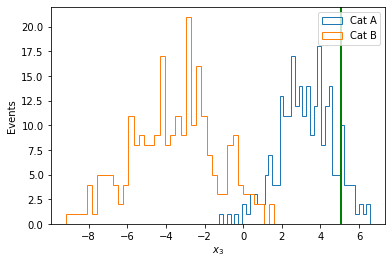

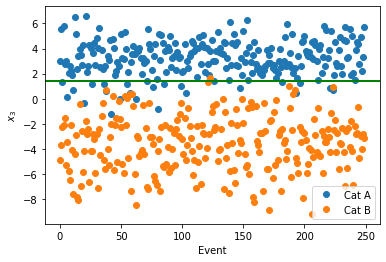

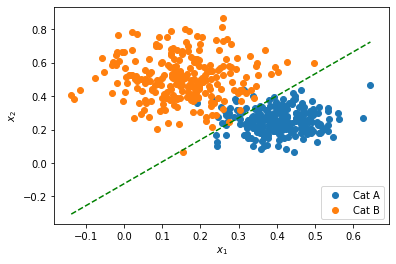

In [93]:
import matplotlib . pyplot as plt
import numpy as np

# x1_a , x2_a = np.loadtxt ('exam2020_cata.txt')
# x1_b , x2_b = np.loadtxt ('exam2020_catb.txt')

x1_a = np.loadtxt("exam2020_cata.txt")[:,0 ] #first column of data set A
x2_a = np.loadtxt("exam2020_cata.txt")[:,1 ] #second column of data set A
x1_b = np.loadtxt("exam2020_catb.txt")[:,0 ] #first column of data set B
x2_b = np.loadtxt("exam2020_catb.txt")[:,1 ] #second column of data set B

# part i)


fig = plt . figure (1)
plt . scatter ( x1_a , x2_a , label ='Cat A')
plt . scatter ( x1_b , x2_b , label ='Cat B')
plt . xlabel ('$x_1$ ')
plt . ylabel ('$x_2$ ')
plt . legend ( loc ='best')
fig . show ()

# part ii)


V_a = np . cov ( x1_a , x2_a )
V_b = np . cov ( x1_b , x2_b )
mu_a = np . array ([ np . mean ( x1_a ), np . mean ( x2_a )])
mu_b = np . array ([ np . mean ( x1_b ), np . mean ( x2_b )])
c = np . linalg . inv ( V_a + V_b ). dot ( mu_a - mu_b )
print ('weighting factors c=', c)


# calculate x_new for both classes
xnew_a = [np.array ([ x1_a [ i], x2_a [i ]]). dot (c) for i in range ( len ( x1_a ))]
xnew_b = [ np . array ([ x1_b [ i], x2_b [i ]]). dot (c) for i in range ( len ( x1_b ))]

# part iii )
rej_a_90p = np.quantile(xnew_a , 0.90)
rej_a_10p = np.quantile(xnew_a , 0.10)
print ('90% rejection on A reached for xnew > {:3f} [ numpy ]'. format ( rej_a_90p ))
# manually find the quantile for an array


def find_quantile ( arr , quantile , niter =100):
    
    # find xtmp such as int (arr , -infty , xtmp )/ int (arr , -infty , infty ) < quantile
    for xtmp in np . linspace ( min ( arr ), max ( arr ), niter ):
        if len ([ x for x in arr if x < xtmp ])/ len ( arr ) > quantile :
            return xtmp
    raise ValueError ('Failed to find quantile .')

    

print ('90% rejection on A reached for xnew > {:3f}[manual]'.format(find_quantile(xnew_a,0.90)))



# find the fraction of events above a value
def fraction_above ( arr , value ):
    return len ([ x for x in arr if x >= value ])/ len ( arr )


print ('B accept. for x_3 > {:3f}: {:3f}'. format (rej_a_90p, fraction_above ( xnew_b , rej_a_10p )))


fig = plt . figure (2)
quant_bins = np . linspace ( min ( xnew_a ), max ( xnew_a ), 500)
acc_b = [ len ([ x for x in xnew_b if x >= value ])/ len ( xnew_b ) for value in quant_bins ]
rej_a = [ len ([ x for x in xnew_a if x < value ])/ len ( xnew_a ) for value in quant_bins ]
plt . plot ( quant_bins , rej_a , label ='A rejection')
plt . plot ( quant_bins , acc_b , label ='B acceptance')
plt . axvline (x = rej_a_90p , linewidth =2 , color ='g', label ='90% A rejection')
plt . xlabel ('$x_{new}$')
plt . ylabel ('Acceptance / rejection power ')
plt . legend ( loc ='best')
plt . grid ()
fig . show ()
fig = plt . figure (3)
plt . hist ( xnew_a , bins =40 , label ='Cat A', histtype ='step')
plt . hist ( xnew_b , bins =40 , label ='Cat B', histtype ='step')
plt . axvline (x = rej_a_90p , linewidth =2 , color ='g')
plt . xlabel ('$x_{3}$')
plt . ylabel ('Events')
plt . legend ( loc ='best')
plt.savefig('x3 hist.jpg')
fig . show ()
# Fisher classifier
fig = plt . figure (4)
plt . plot ( xnew_a , 'o', label ='Cat A')
plt . plot ( xnew_b , 'o', label ='Cat B')
plt . axhline (y = rej_a_10p , linewidth =2 , color ='g')
plt . xlabel ('Event')
plt . ylabel ('$x_{3}$')
plt . legend ( loc ='best')
# overlay of Fisher cut with initial x1/x2
fig = plt . figure (5)
plt . scatter ( x1_a , x2_a , label ='Cat A')
plt . scatter ( x1_b , x2_b , label ='Cat B')
x1 = np . linspace (min (min ( x1_a ), min( x1_b )) , max (max ( x1_a ), max( x1_b )) , 100)
x2 = ( rej_a_10p - c [0]* x1 )/ c [1]
plt . plot ( x1 , x2 , linestyle ='dashed', color ='g')
plt . xlabel ('$x_1$')
plt . ylabel ('$x_2$')
plt . legend ( loc ='best')
plt.savefig('x1x2plane.jpg')
#input ()

In [96]:
x_1_test = 0.30
x_2_test = 0.30

l=(0.30-mu_a).T * np.linalg.inv(V_a)*(0.30-mu_a)
r = (0.30-mu_b).T*np.linalg.inv(V_b)*(0.30-mu_b)

print(l)
print(r)
if l.any() < r.any():
    print('Cat a')
else:
    print('Cat b')

print('Events in class A = x1_a + x2_a = %f + %f = %f' %(len(x1_a), len(x2_a), len(x1_a)+len(x2_a)))
print('Events in class B = x1_b + x2_b = %f + %f = %f' %(len(x1_b), len(x2_b), len(x1_b)+len(x2_b)))
print('Total events = %f' %(len(x1_b)+len(x2_b)+len(x1_a)+len(x2_a)))


print(V_a, '\n')
print(V_b, '\n')
print(mu_a, '\n')
print(mu_b, '\n')
sig_x1_a = np.sqrt(V_a[0][0])
sig_x2_a = np.sqrt(V_a[1][1])
sig_x1_b = np.sqrt(V_b[0][0])
sig_x2_b = np.sqrt(V_b[1][1])

P_A_x1 = 1/(np.sqrt(2*np.pi)*sig_x1_a)*np.exp(-1/2 *((0.30-mu_a[0])/sig_x1_a)**2)


print(P_A_x1)

[[ 1.89599421 -0.01111887]
 [-0.05662351  0.42325547]]
[[ 1.97791067 -0.04146436]
 [-0.02061755  2.51552394]]
Cat b
Events in class A = x1_a + x2_a = 250.000000 + 250.000000 = 500.000000
Events in class B = x1_b + x2_b = 250.000000 + 250.000000 = 500.000000
Total events = 1000.000000
[[0.00565831 0.00014864]
 [0.00014864 0.0049772 ]] 

[[0.01076365 0.00017742]
 [0.00017742 0.01702063]] 

[0.403536 0.25412 ] 

[0.1541032 0.506902 ] 

2.0567421653059093


In [99]:
r_1 = np.exp(-0.5*(0.30-mu_a)*np.linalg.inv(V_a)*(0.30-mu_a)+(1/2 *(0.30-mu_b)*np.linalg.inv(V_a)*(0.30-mu_b)))
r_2 = np.exp((mu_a-mu_b).T*np.linalg.inv(V_b)*0.30-(1/2 * mu_a.T*np.linalg.inv(V_b)*mu_a)+(1/2 * mu_b.T*np.linalg.inv(V_b)*mu_b))

pi_a = 0.5
pi_b = 0.5

P_1 = 1/(1+(pi_a/pi_b*r))
P_2 = 1/(1+(pi_a/pi_b*r_2))

print(r)


[[ 1.97791067 -0.04146436]
 [-0.02061755  2.51552394]]
